In [1]:
import pandas as pd
import seaborn as sns
import re
cols = ['Plant','Asset','Start Time','Event Type','Energy Loss  (kWh)']
df = pd.read_csv('sm3.csv',usecols=cols,dtype={"Energy Loss  (kWh)": 'Float64'})
df.set_index(['Plant','Asset'])

Event Type  \
Plant                                              Asset                                                                   
047 - San Diego Inspiration Point                  INV04 - INV - 4                                     Inverter Degraded   
006 - City of San Diego- Point Loma Library        INV01 - INV-1                                       Inverter Degraded   
009 - Kings Highway                                009 - Kings Highway                                   Plant Comm Loss   
042 - Stockton East Water District -  Low Side ... INV10 - INVERTER 10                                 Inverter Degraded   
                                                   INV07 - INVERTER 7                                  Inverter Degraded   
                                                   INV01 - INVERTER 1                                  Inverter Degraded   
                                                   INV08 - INVERTER 8                                  Inverter Degraded   
                                                   042 - Stockton East Water District -  Low Side ...     Plant Degraded   
                                                   INV06 - INVERTER 6                                  Inverter Degraded   
                                                   INV02 - INVERTER 2                                  Inverter Degraded   
                                                   INV15 - INVERTER 15                                 Inverter Degraded   
                                                   INV03 - INVERTER 3                                  Inverter Degraded   
                                                   INV05 - INVERTER 5                                  Inverter Degraded   
                                                   INV09 - INVERTER 9                                  Inverter Degraded   
041 - Stockton East Water District -  High Side... INV13 - INVERTER 13                                 Inverter Degraded   
                                                   INV01 - INVERTER 1                                  Inverter Degraded   
                                                   INV03 - INVERTER 3                                  Inverter Degraded   
042 - Stockton East Water District -  Low Side ... INV04 - INVERTER 4                                  Inverter Degraded   
041 - Stockton East Water District -  High Side... 041 - Stockton East Water District -  High Side...     Plant Degraded   
                                                   INV07 - INVERTER 7                                  Inverter Degraded   
                                                   INV06 - INVERTER 6                                  Inverter Degraded   
                                                   INV10 - INVERTER 10                                 Inverter Degraded   
                                                   INV11 - INVERTER 11                                 Inverter Degraded   
                                                   INV02 - INVERTER 2                                  Inverter Degraded   
                                                   INV09 - INVERTER 9                                  Inverter Degraded   
                                                   INV12 - INVERTER 12                                 Inverter Degraded   
                                                   INV15 - INVERTER 15                                 Inverter Degraded   
                                                   INV05 - INVERTER 5                                  Inverter Degraded   
                                                   INV14 - INVERTER 14                                 Inverter Degraded   
                                                   INV04 - INVERTER 4                                  Inverter Degraded   
...                                                                                                                  ...   
034 - Pima - Wheel

In [4]:
df['Plant'].head()

0                    047 - San Diego Inspiration Point
1          006 - City of San Diego- Point Loma Library
2                                  009 - Kings Highway
3    042 - Stockton East Water District -  Low Side...
4    042 - Stockton East Water District -  Low Side...
Name: Plant, dtype: object

In [5]:
df['Energy Loss  (kWh)'].max()

15836.642130000002

In [6]:
grouped = df['Energy Loss  (kWh)'].groupby(df['Event Type'])

In [7]:
grouped

In [8]:
grouped.mean()

Event Type
Comm Loss                   NaN
Down (Plant Down)     31.369920
Inv Down             198.532545
Inverter Degraded     13.189495
Plant Comm Loss             NaN
Plant Degraded              NaN
Plant Down           215.917362
Name: Energy Loss  (kWh), dtype: float64

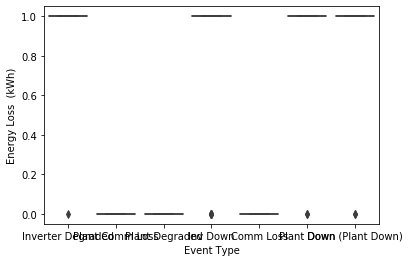

In [14]:
sns.boxplot( x=df['Event Type'],y=df["Energy Loss  (kWh)"] )

In [25]:
df2 = df.sample(n=100)
df2.set_index('Plant')

,Event Type,Asset,Start Time,Energy Loss (kWh)
Plant,,,,
006 - City of San Diego- Point Loma Library,Plant Degraded,006 - City of San Diego- Point Loma Library,10/31/2019 08:25:00,NaN
042 - Stockton East Water District - Low Side - Ph.II,Inverter Degraded,INV03 - INVERTER 3,10/09/2019 16:45:00,21.24967
056 - Pima Community County College NW - PCC NW,Inverter Degraded,INV01 - INV-16,10/27/2019 16:05:00,3.27348
003 - Templeton USD - Templeton High School,Inverter Degraded,INV05 - Inverter No 5,10/08/2019 08:20:00,1.15204
028 - Tracy USD - West HS,Inverter Degraded,INV06 - INV-6,10/18/2019 15:40:00,12.81203
060 - Midland Park - Godwin Elementary,Plant Degraded,060 - Midland Park - Godwin Elementary,10/21/2019 15:35:00,NaN
060 - Midland Park - Godwin Elementary,Inverter Degraded,INV02 - PV1-2,10/24/2019 08:45:00,2.44337
038 - Pima Animal Care Center - 2,Inverter Degraded,INV01 - INV-01,10/07/2019 15:35:00,3.23478
053 - City of San Diego- Park De La Cruz,Inverter Degraded,INV01 - INV-1,10/19/2019 08:10:00,13.81262


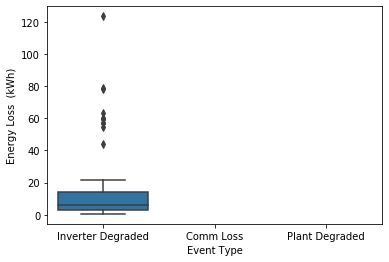

In [19]:
sns.boxplot( x=df2['Event Type'],y=df2["Energy Loss  (kWh)"] )

In [24]:
df2.head(5)

,Event Type,Plant,Asset,Start Time,Energy Loss (kWh)
4884,Inverter Degraded,029 - San Diego- Police Central Division Garage,INV02 - INV-2,10/20/2019 08:15:00,1.16568
5297,Inverter Degraded,028 - Tracy USD - West HS,INV12 - INV-12,10/18/2019 16:45:00,4.92338
6878,Comm Loss,063 - Midland Park High,INV01 - PV1-1,10/15/2019 18:40:00,NaN
4918,Comm Loss,019 - Bridgeport Wonderland of Ice,PYR01 - Pyranometer POA,10/19/2019 18:25:00,NaN
8034,Plant Degraded,003 - Templeton USD - Templeton High School,003 - Templeton USD - Templeton High School,10/12/2019 16:50:00,NaN


In [26]:
df3 = df2[1:4]

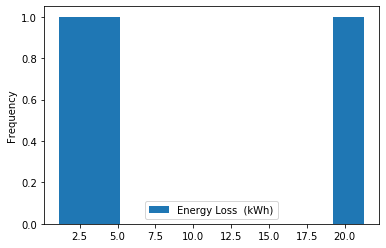

In [29]:
df3.plot.hist()

In [7]:
def clean_plant_name(s):
    regex = '\d\d\d\s\W\s'
    s = re.sub(regex,'',s)
    return s

In [8]:
df['Plant'] = df['Plant'].apply(clean_plant_name)

In [9]:
df['Plant'].head()

0                         San Diego Inspiration Point
1               City of San Diego- Point Loma Library
2                                       Kings Highway
3    Stockton East Water District -  Low Side - Ph.II
4    Stockton East Water District -  Low Side - Ph.II
Name: Plant, dtype: object